**Importing the Required Libraries**

In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

**Importing data from google drive into tensorflow dataset object**

In [ ]:
df=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Tomato_Photos",batch_size=32,
    image_size=(256, 256),shuffle=True)

Found 6627 files belonging to 4 classes.


In [ ]:
classes=df.class_names
classes

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_healthy']

In [ ]:
#length of the dataset
len(df)

208

Defining some static variables 

In [ ]:
IMAGE_SIZE=256
BATCH_SiZE=32
CHANNELS=3


In [ ]:
for image_batch,label_batch in df.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 2 0 3 2 1 2 2 2 0 2 0 0 3 3 3 3 2 2 2 2 0 2 0 1 3 2 0 3 2 2 0]


Here the each element in the datset is tuple  and containg a batch of 32 images 

In [ ]:
for image_batch,label_batch in df.take(1):
    print(image_batch[0].numpy())
    print(image_batch[0].shape)

[[[165. 160. 157.]
  [164. 159. 156.]
  [164. 159. 156.]
  ...
  [134. 126. 123.]
  [139. 131. 128.]
  [148. 140. 137.]]

 [[165. 160. 157.]
  [164. 159. 156.]
  [164. 159. 156.]
  ...
  [132. 124. 121.]
  [136. 128. 125.]
  [143. 135. 132.]]

 [[166. 161. 158.]
  [164. 159. 156.]
  [164. 159. 156.]
  ...
  [139. 131. 128.]
  [140. 132. 129.]
  [142. 134. 131.]]

 ...

 [[165. 158. 152.]
  [166. 159. 153.]
  [168. 161. 155.]
  ...
  [129. 118. 112.]
  [131. 120. 114.]
  [132. 121. 115.]]

 [[165. 158. 152.]
  [167. 160. 154.]
  [169. 162. 156.]
  ...
  [129. 118. 112.]
  [131. 120. 114.]
  [132. 121. 115.]]

 [[166. 159. 153.]
  [168. 161. 155.]
  [171. 164. 158.]
  ...
  [131. 120. 114.]
  [131. 120. 114.]
  [132. 121. 115.]]]
(256, 256, 3)


Plotting the few images of the dataset

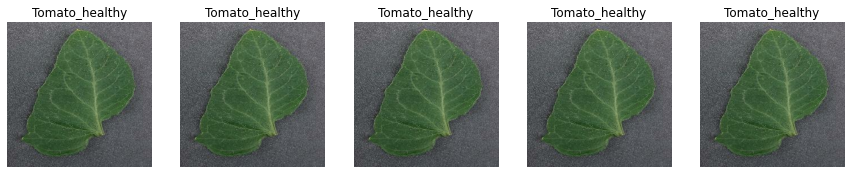

In [ ]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in df.take(1):
    for i in range(5):
        sp=plt.subplot(4,5,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(classes[label_batch[0]])
        plt.axis("off")
        
       

**Splitting the dataset into 3 parts**

Training: Dataset to be used during training the model.

Validation: Dataset to be tested against while training.

Test: Dataset to be tested used for testing the model when the training process is over.

In [ ]:
#defining a function to get train ,test and validation dataset
def dataset_partitions(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size= int(train_split *ds_size)
    val_size =int(val_split * ds_size)
    
    train_ds =ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds =dataset_partitions(df)

In [ ]:
#Cache, Shuffle, and Prefetch the Dataset
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
# resizing and rescaling the pixels of the images to get the better accuracy for this model
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])


**Data Augmentation** this will help the accuracy of our model by augmenting the data.

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

**Building a CNN Model**

Adding the initial layers for resizing ,normalization and data augmentation,useing softax as a activation function for the final layer.


In [ ]:

input_shape = (BATCH_SiZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)


model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(4, activation='softmax'),
])
model.build(input_shape=input_shape)

In [ ]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

Here using Adam Optimizer,  sparse categorical cross-entropy fot the loss because we’re dealing with a Multi-Class Classification problem , using accuracy measures to track our model’s training performance


In [ ]:
#Compiling the Tomato Leaf Disease Classification model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

**Training the network**

In [ ]:
 model.fit(
    train_ds,
    batch_size=BATCH_SiZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
166/166 [==============================] - 832s 77ms/step - loss: 1.1639 - accuracy: 0.4918 - val_loss: 1.0031 - val_accuracy: 0.6891
Epoch 2/50
166/166 [==============================] - 7s 40ms/step - loss: 0.7653 - accuracy: 0.7130 - val_loss: 0.6112 - val_accuracy: 0.7391
Epoch 3/50
166/166 [==============================] - 7s 40ms/step - loss: 0.5729 - accuracy: 0.7573 - val_loss: 0.5714 - val_accuracy: 0.7344
Epoch 4/50
166/166 [==============================] - 7s 40ms/step - loss: 0.4863 - accuracy: 0.8001 - val_loss: 0.5926 - val_accuracy: 0.7453
Epoch 5/50
166/166 [==============================] - 7s 40ms/step - loss: 0.3999 - accuracy: 0.8380 - val_loss: 0.4550 - val_accuracy: 0.7953
Epoch 6/50
166/166 [==============================] - 7s 40ms/step - loss: 0.3771 - accuracy: 0.8467 - val_loss: 0.4181 - val_accuracy: 0.8438
Epoch 7/50
166/166 [==============================] - 7s 40ms/step - loss: 0.3595 - accuracy: 0.8573 - val_loss: 0.3939 - val_accuracy: 0.84

Getting the accuracy of 96 percent on the training data 

In [ ]:
scores = model.evaluate(test_ds)

22/22 [==============================] - 6s 17ms/step - loss: 0.0626 - accuracy: 0.9730


In [ ]:
scores
#also getting the accuracy score of 97 percent on test dataset which is good

[0.06256452947854996, 0.9730113744735718]

Running prediction on a sample image

first image to predict
actual label: Tomato_Late_blight
predicted label: Tomato_Late_blight


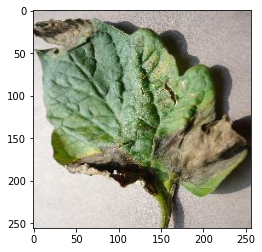

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",classes[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",classes[np.argmax(batch_prediction[0])])

Writing a function for prediction

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

 Running the prediction on few sample images

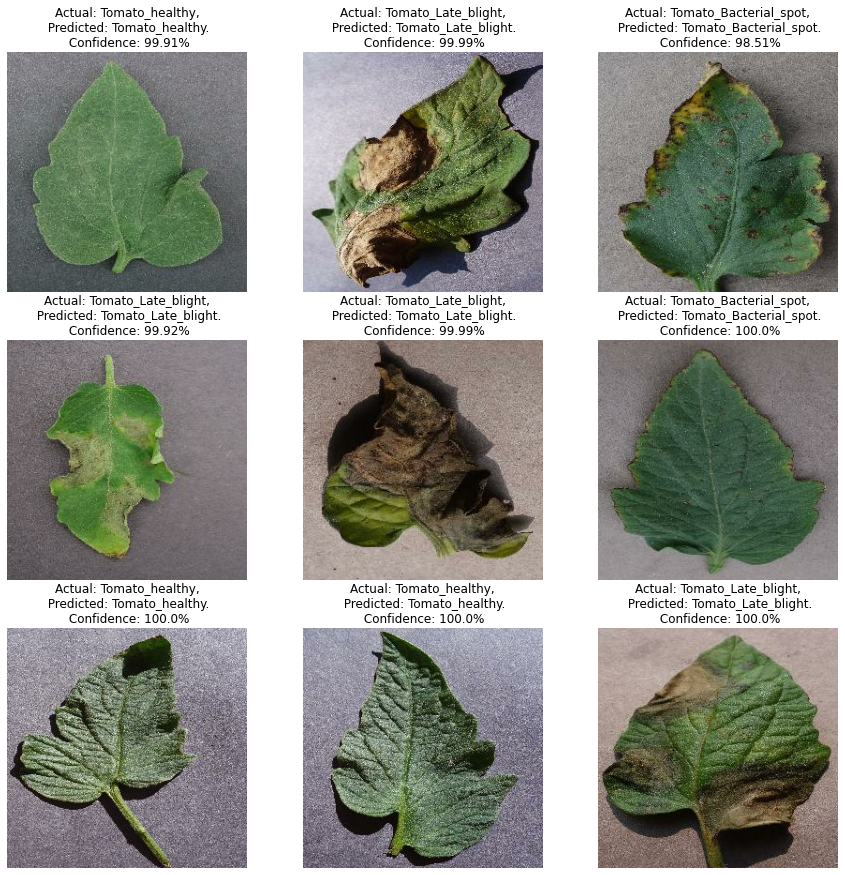

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = classes[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

Saving the Model 

In [ ]:
model.save('model_trained.p')